In [2]:
from datascience import *
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [3]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

## Classifying Patients CKD ##

In [4]:
ckd = Table.read_table('../Datasets/ckd.csv').relabeled('Blood Glucose Random', 'Glucose')
ckd.show(3)

Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1
63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,1


In [5]:
ckd.group('Class')

Class,count
0,115
1,43


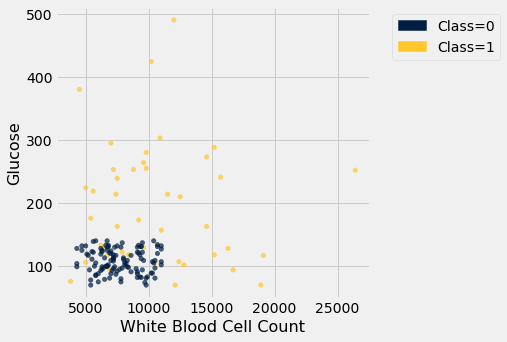

In [6]:
ckd.scatter('White Blood Cell Count', 'Glucose', group='Class')

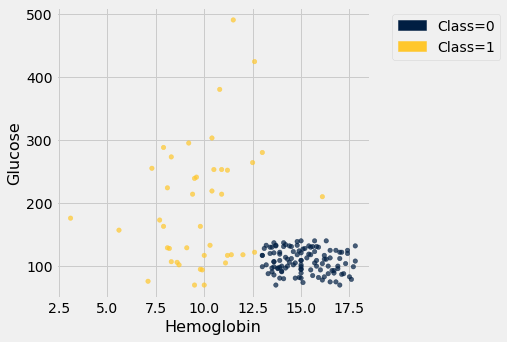

In [7]:
ckd.scatter('Hemoglobin', 'Glucose', group='Class')

In [8]:
# we want to be able to way to predict the class of someone
# without having to plot & eye ball this graph every time.
#
# one way to do this is to put some thresholds into code

max_glucose_for_0 = ckd.where('Class',are.equal_to(0)).column('Glucose').max()
min_hemoglobin_for_0 = ckd.where('Class',are.equal_to(0)).column('Hemoglobin').min()

max_glucose_for_0, min_hemoglobin_for_0

(140, 13.0)

In [9]:
def classify(hemoglobin, glucose):
    if hemoglobin < min_hemoglobin_for_0 or glucose > max_glucose_for_0:
        return 1
    else:
        return 0

In [10]:
# Let's try our classifier!
classify(15, 100)

0

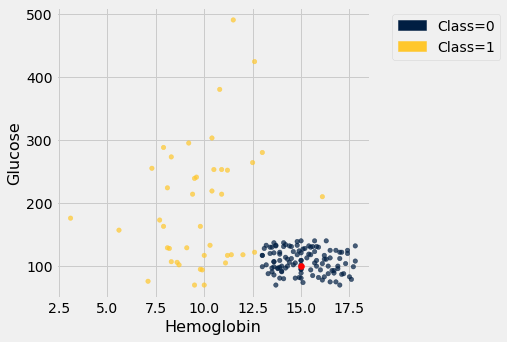

In [11]:
ckd.scatter('Hemoglobin', 'Glucose', group='Class')
plots.scatter(15, 100, color='red');

In [12]:
classify(10, 300)

1

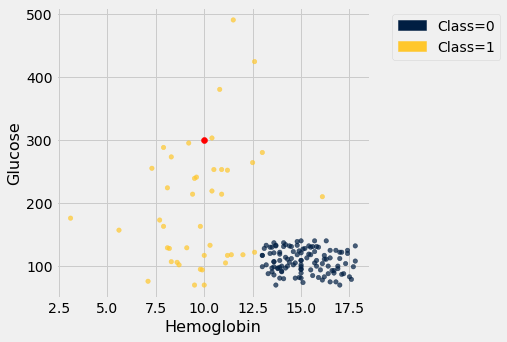

In [13]:
ckd.scatter('Hemoglobin', 'Glucose', group='Class')
plots.scatter(10, 300, color='red');

## Classifying Banknotes ##

In [16]:
banknotes = Table.read_table('../Datasets/banknote.csv')
banknotes

WaveletVar,WaveletSkew,WaveletCurt,Entropy,Class
3.6216,8.6661,-2.8073,-0.44699,0
4.5459,8.1674,-2.4586,-1.4621,0
3.866,-2.6383,1.9242,0.10645,0
3.4566,9.5228,-4.0112,-3.5944,0
0.32924,-4.4552,4.5718,-0.9888,0
4.3684,9.6718,-3.9606,-3.1625,0
3.5912,3.0129,0.72888,0.56421,0
2.0922,-6.81,8.4636,-0.60216,0
3.2032,5.7588,-0.75345,-0.61251,0
1.5356,9.1772,-2.2718,-0.73535,0


In [17]:
banknotes.group('Class')

Class,count
0,762
1,610


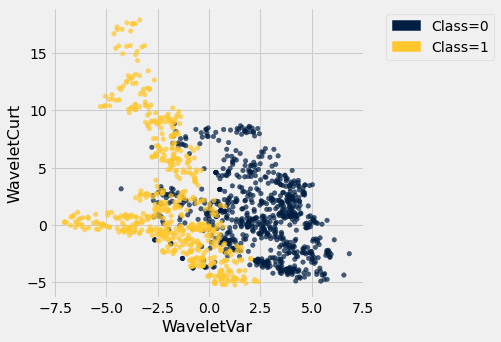

In [18]:
banknotes.scatter('WaveletVar', 'WaveletCurt', group='Class')

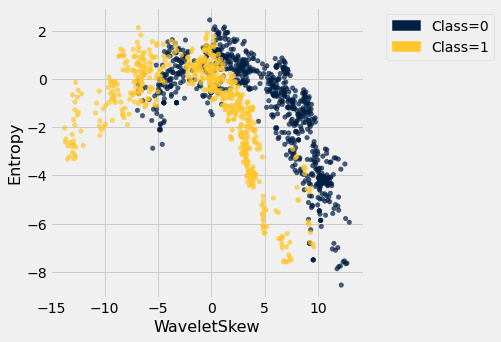

In [19]:
banknotes.scatter('WaveletSkew', 'Entropy', group='Class')

C:\Users\adeve\AppData\Local\Temp/ipykernel_29348/4103308493.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


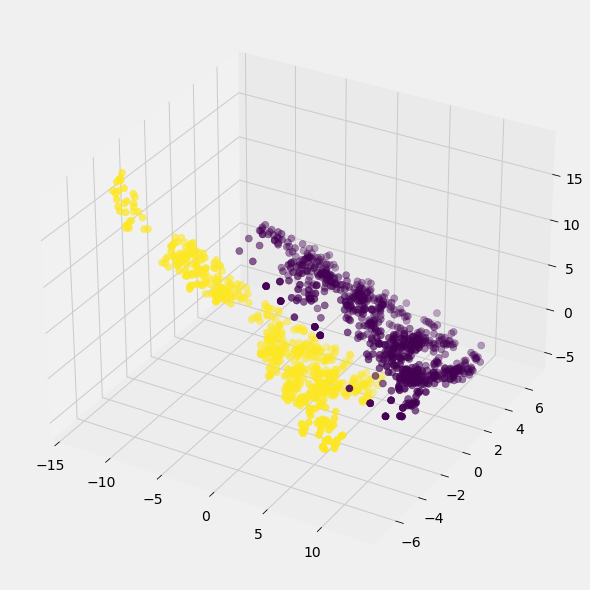

In [20]:
fig = plots.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.scatter(banknotes.column('WaveletSkew'), 
           banknotes.column('WaveletVar'), 
           banknotes.column('WaveletCurt'), 
           c=banknotes.column('Class'),
           cmap='viridis',
          s=50);

## Back to Classifying Patients CKD##

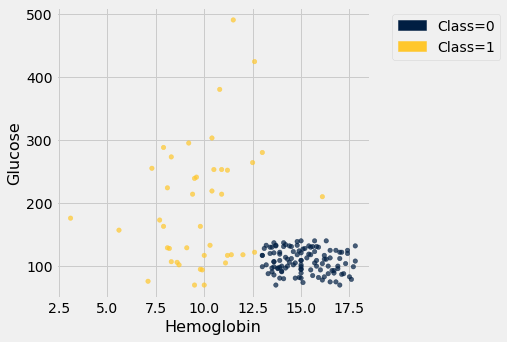

In [21]:
ckd.scatter('Hemoglobin', 'Glucose', group='Class')

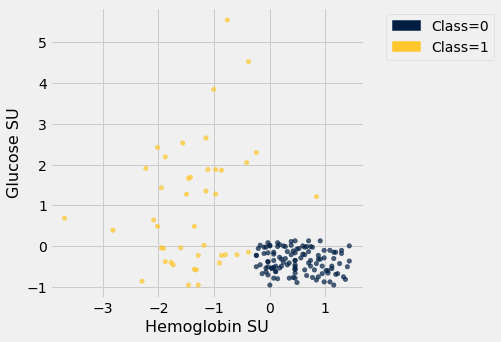

In [22]:
ckd = ckd.with_columns(
    'Hemoglobin SU', standard_units(ckd.column('Hemoglobin')),
    'Glucose SU', standard_units(ckd.column('Glucose'))
)

ckd.scatter('Hemoglobin SU', 'Glucose SU', group='Class')

In [23]:
x_array = make_array()
y_array = make_array()
for x in np.arange(-4, 2, 0.2):
    for y in np.arange(-1, 6, 0.2):
        x_array = np.append(x_array, x)
        y_array = np.append(y_array, y)
        


In [24]:
x_array, y_array

(array([-4. , -4. , -4. , ...,  1.8,  1.8,  1.8]),
 array([-1. , -0.8, -0.6, ...,  5.4,  5.6,  5.8]))

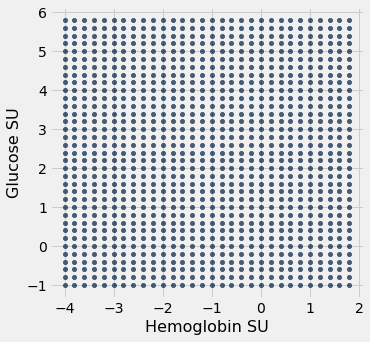

In [25]:
test_grid = Table().with_columns(
    'Hemoglobin SU', x_array,
    'Glucose SU', y_array
)

test_grid.scatter('Hemoglobin SU')

In [26]:
max_glucose_SU_for_0 = ckd.where('Class',are.equal_to(0)).column('Glucose SU').max()
min_hemoglobin_SU_for_0 = ckd.where('Class',are.equal_to(0)).column('Hemoglobin SU').min()

max_glucose_SU_for_0, min_hemoglobin_SU_for_0

(0.13375085451774507, -0.2392361138204237)

In [27]:
def classify_SU(hemoglobin_SU, glucose_SU):
    if hemoglobin_SU < min_hemoglobin_SU_for_0 or glucose_SU > max_glucose_SU_for_0:
        return 1
    else:
        return 0

In [28]:
test_grid = test_grid.with_column(
    'Classification', test_grid.apply(classify_SU, 'Hemoglobin SU', 'Glucose SU'))

In [29]:
test_grid

Hemoglobin SU,Glucose SU,Classification
-4,-1,1
-4,-0.8,1
-4,-0.6,1
-4,-0.4,1
-4,-0.2,1
-4,-2.22045e-16,1
-4,0.2,1
-4,0.4,1
-4,0.6,1
-4,0.8,1


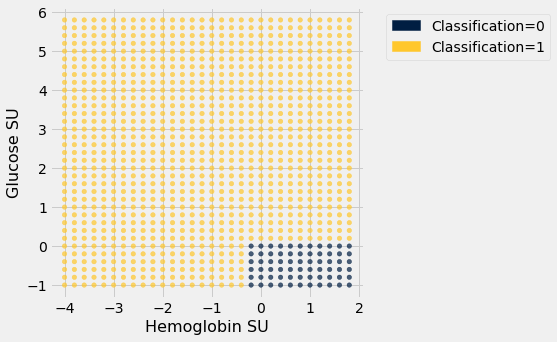

In [30]:
test_grid.scatter('Hemoglobin SU', 'Glucose SU', group='Classification')

## Nearest Neighbor ##

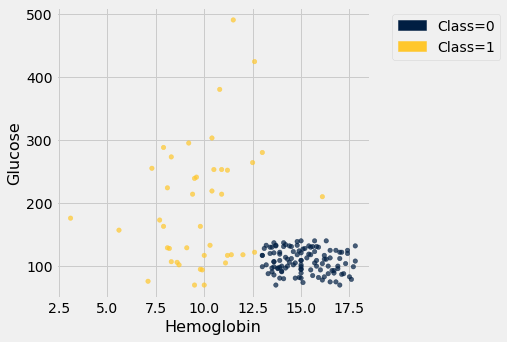

In [31]:
ckd.scatter('Hemoglobin', 'Glucose', group='Class')

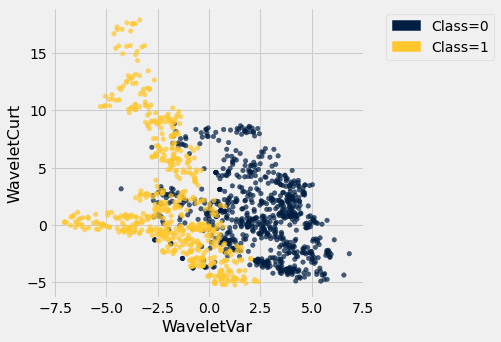

In [32]:
banknotes.scatter('WaveletVar', 'WaveletCurt', group='Class')

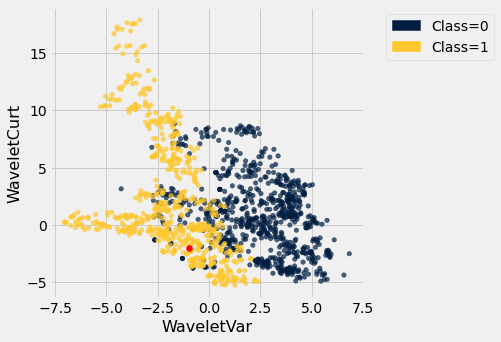

In [33]:
banknotes.scatter('WaveletVar', 'WaveletCurt', group='Class')
plots.scatter(-1, -2, color='red');

(-1.5, -0.5)

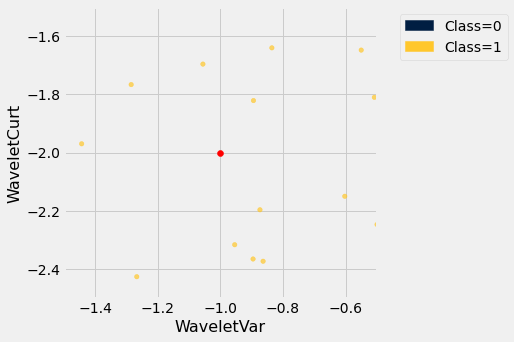

In [34]:
banknotes.scatter('WaveletVar', 'WaveletCurt', group='Class')
plots.scatter(-1, -2, color='red');
plots.ylim(-2.5, -1.5)
plots.xlim(-1.5, -0.5)